### Import Libraries

In [9]:
import pandas as pd
import numpy as np

### Import data

In [10]:
dataset = pd.read_excel('URINELOT1.xlsx')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      124 non-null    int64  
 1   UHID                            124 non-null    int64  
 2   Patients Name                   124 non-null    object 
 3   Age                             121 non-null    float64
 4   Gender                          124 non-null    object 
 5   Date                            124 non-null    object 
 6   E.coli                          117 non-null    float64
 7   K. Pneumoniae                   119 non-null    float64
 8   P.aurogenosa                    120 non-null    float64
 9   A.baumnnii                      119 non-null    float64
 10  P.mirabilis                     120 non-null    float64
 11  E.faecalis                      118 non-null    float64
 12  S. aureus                       120 

In [12]:
dataset.head()

,Unnamed: 0,UHID,Patients Name,Age,Gender,Date,E.coli,K. Pneumoniae,P.aurogenosa,A.baumnnii,...,cleanAIIMS,Escherichia coli_A,Klebsiella pneumoniae_A,Pseudomonas aeruginosa_A,Acinetobacter baumannii_A,Proteus mirabilis_A,Enterococcus faecalis_A,Staphylococcus aureus_A,Staphylococcus saprophyticus_A,Sterile_A
0,0,20220065432,Sahroj,33.0,F,13/02/2024,NaN,NaN,-5.26086,-4.09794,...,ENTEROCOCCUS FAECALIS,0,0,0,0,0,1,0,0,0
1,1,20230125389,Saloni,19.0,F,15/02/2024,-15.30980,-10.01740,-9.09993,-8.30414,...,E COLI,1,0,0,0,0,0,0,0,0
2,2,20180022685,Ravita,34.0,F,15/02/2024,-7.70704,-8.08910,-4.79176,-8.63416,...,CONTAMINATION,0,0,0,0,0,0,0,0,0
3,3,20240012395,kedari Devi,38.0,F,15/02/2024,-10.25510,-7.26028,-6.89303,-14.34320,...,E COLI,1,0,0,0,0,0,0,0,0
4,4,20220166372,Babita Devi,45.0,F,16/02/2024,-8.87334,-5.39780,-12.27840,-8.01114,...,E COLI & PSEUDOMNAS,1,0,1,0,0,0,0,0,0


In [15]:
dataset.shape

(124, 36)

In [17]:
dataset = dataset[['E.coli','Escherichia coli_A']]

In [19]:
dataset.head()

,E.coli,Escherichia coli_A
0,NaN,0
1,-15.30980,1
2,-7.70704,0
3,-10.25510,1
4,-8.87334,1


In [29]:
dataset.columns = ['score','outcome']
dataset = dataset.dropna()

In [30]:
dataset.head()

,score,outcome
1,-15.30980,1
2,-7.70704,0
3,-10.25510,1
4,-8.87334,1
5,-11.28200,1


In [31]:
# Convert to numeric, invalid parsing will be set as NaN
dataset['score'] = pd.to_numeric(dataset['score'], errors='coerce')
dataset['outcome'] = pd.to_numeric(dataset['outcome'], errors='coerce')

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 123
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score    117 non-null    float64
 1   outcome  117 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [9]:
# Drop NaN values
#dataset = dataset.dropna(subset=['Parameter', 'Outcome'])

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 1 to 123
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score    117 non-null    float64
 1   outcome  117 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [34]:
dataset.shape

(117, 2)

<Axes: xlabel='outcome', ylabel='count'>

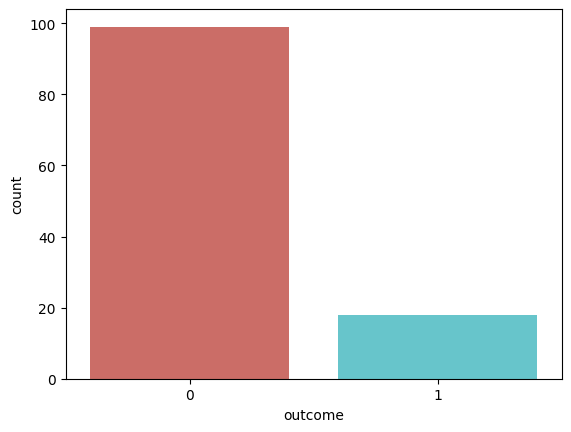

In [36]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='outcome', data=dataset, palette='hls')

<Axes: xlabel='score', ylabel='outcome'>

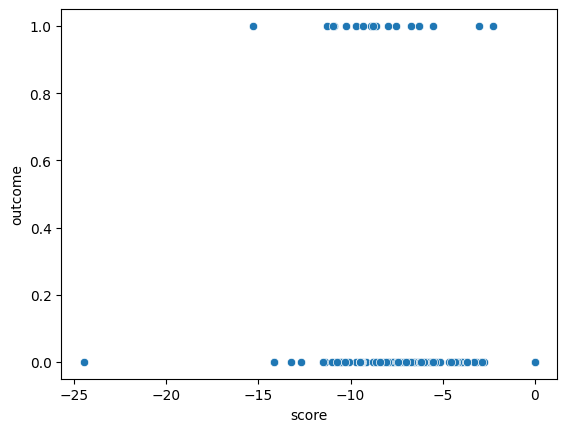

In [37]:
sns.scatterplot(x='score',y='outcome',data=dataset)

<Axes: >

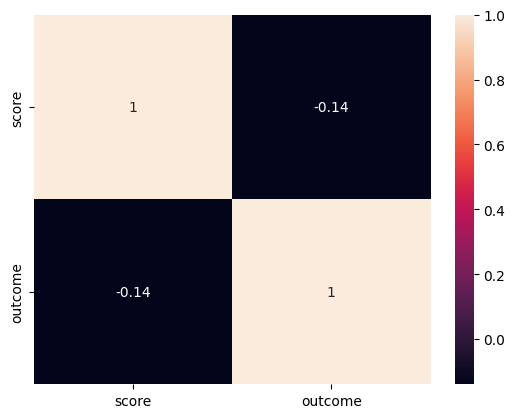

In [38]:
sns.heatmap(dataset.corr(),annot=True)

In [40]:
dataset.groupby('outcome').mean()

,score
outcome,
0,-7.016808
1,-8.308902


<Axes: xlabel='outcome', ylabel='score'>

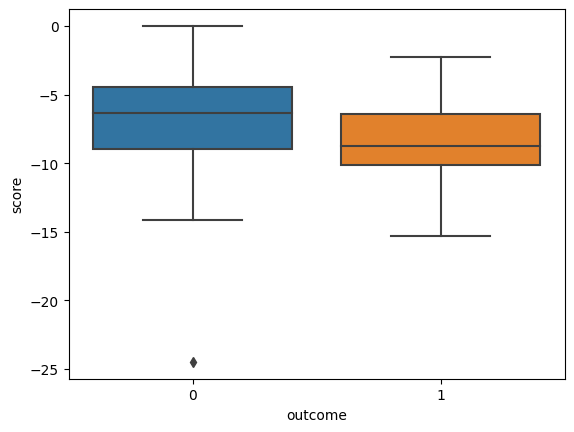

In [42]:
sns.boxplot(x='outcome',y='score',data=dataset)

In [43]:
#..............Assigning X and Y variables...........#
x = dataset.drop(['outcome'], axis=1)
y = np.array(dataset['outcome']).reshape(-1,1) 

In [44]:
#.............Split train and test sets..............#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=25, stratify=y)

In [45]:
#...............Feature scaling..................#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [47]:
dataset.groupby('outcome').mean()

,score
outcome,
0,-7.016808
1,-8.308902


In [35]:
#dataset.isnull().sum()

In [36]:
#sns.boxplot(x='Outcome', y='Glucose', data=dataset, palette='hls')

In [37]:
#sns.heatmap(dataset.corr())

### Run all algorithms

In [48]:
def y_pred(x_train, x_test, y_train, y_test):
    from classmodels import classifiers
    # Create an instance of MyClass
    my_instance = classifiers(x_train, x_test, y_train, y_test)
    scoreind = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC', 'PPV', 'NPV', 'PLR', 'NLR']
    # List of method names you want to call
    methods_to_call = ['logreg', 'dt']
    #methods_to_call = ['lr', 'lasso','rf']

    tempY = []
    tempS = []
    tempYProb = []
    # Use a loop to call the methods
    for method_name in methods_to_call:
        # Use getattr to get the method by name and then call it
        method = getattr(my_instance, method_name)
        y_pred = method(x_train, x_test, y_train, y_test)[0]
        scores = method(x_train, x_test, y_train, y_test)[1]
        y_pred_prob = method(x_train, x_test, y_train, y_test)[2]
        tempY.append(y_pred.reshape(-1, 1))
        tempS.append(scores.reshape(-1, 1))
        tempYProb.append(y_pred_prob.reshape(-1, 1))

    tempY = np.hstack(tempY)  # Stack the column vectors horizontally
    predAll = pd.DataFrame(data=tempY, columns=methods_to_call)
    tempS = np.hstack(tempS)  # Stack the column vectors horizontally
    scoresAll = pd.DataFrame(data=tempS, columns=methods_to_call, index=scoreind)
    tempYProb = np.hstack(tempYProb)
    YProbAll = pd.DataFrame(data=tempYProb, columns=methods_to_call)
    #temp = np.concatenate((y_test,temp),1)
    return(predAll,scoresAll,YProbAll)

In [49]:
PredAll = y_pred(x_train, x_test, y_train, y_test)[0]
ScoreAll = y_pred(x_train, x_test, y_train, y_test)[1]
YProbAll = y_pred(x_train, x_test, y_train, y_test)[2]

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\OneDrive - IIT Delhi\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])
c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\OneDrive - IIT Delhi\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])
c:\Users\neelesh\AppData\Local\Progr

In [23]:
PredAll

,logreg,dt
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,1.0,1.0


In [50]:
ScoreAll

,logreg,dt
Accuracy,0.833333,0.611111
Sensitivity,0.833333,0.785714
Specificity,NaN,0.000000
AUC,0.852778,0.366667
PPV,1.000000,0.733333
NPV,0.000000,0.000000
PLR,NaN,0.785714
NLR,NaN,inf


In [51]:
YProbAll

,logreg,dt
0,0.150253,0.0
1,0.144919,0.0
2,0.149637,0.0
3,0.145208,0.0
4,0.151224,1.0
5,0.145851,0.0
6,0.151759,0.0
7,0.150296,0.0
8,0.151181,1.0
9,0.146173,1.0


### ROC Plot

#### Get Y probability

In [52]:
from classmodels import classifiers
my_instance2 = classifiers(x_train, x_test, y_train, y_test)
y_pred2 = my_instance2.logreg(x_train, x_test, y_train, y_test)
#y_pred_quant = my_instance2.predict_proba(x_test)[:, 1]

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\OneDrive - IIT Delhi\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])


In [53]:
y_pred2

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0.83333333, 0.83333333,        nan, 0.85277778, 1.        ,
        0.        ,        nan,        nan]),
 array([0.15025308, 0.14491898, 0.1496372 , 0.14520827, 0.15122358,
        0.14585056, 0.15175901, 0.15029563, 0.15118081, 0.14617258,
        0.15193067, 0.14742469, 0.14847487, 0.15185555, 0.14431097,
        0.14638065, 0.15666991, 0.15540848, 0.14493963, 0.14527033,
        0.14705858, 0.14521862, 0.1458817 , 0.14658897, 0.14948886,
        0.1496372 , 0.1448261 , 0.14830643, 0.14389996, 0.14689146,
        0.14333642, 0.14376659, 0.14454774, 0.14454774, 0.14614139,
        0.14669322]))

In [54]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

# calculate AUC
auc = roc_auc_score(y_test, YProbAll['logreg'])
auc


0.8527777777777777

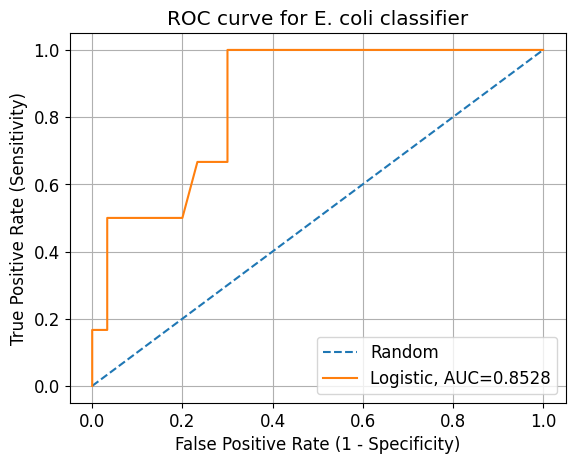

In [57]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate AUC
auc = round(roc_auc_score(y_test, YProbAll['logreg']),4)

# generate a random prediction probability 
y_rand_probs = [0 for _ in range(len(y_test))]

# calculate scores
y_rand_auc = roc_auc_score(y_test, y_rand_probs)
y_test_auc = roc_auc_score(y_test, YProbAll['logreg'])

# # summarize scores
# print('Random: ROC AUC=', y_rand_auc)
# print('Logistic: ROC AUC=', y_test_auc)

# calculate roc curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, y_rand_probs)
fpr, tpr, _ = roc_curve(y_test, YProbAll['logreg'])


# plot the roc curve for the model
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random')
plt.plot(fpr, tpr, label="Logistic, AUC="+str(auc))

plt.rcParams['font.size'] = 12
plt.title('ROC curve for E. coli classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# show the legend
plt.legend()

#### Rough to check

In [1]:
from classmodels import classifiers
from sklearn.metrics import confusion_matrix
my_instance2 = classifiers(x_train, x_test, y_train, y_test)
y_pred = my_instance2.logreg(x_train, x_test, y_train, y_test)
# cm = confusion_matrix(y_test,y_pred)
# cm

NameError: name 'x_train' is not defined

In [8]:
y_pred

(array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64),
 array([0.7965368 , 0.84662577, 0.67647059, 0.8625    , 0.64788732,
        2.61684328, 0.22672713]),
 array([[138,  22],
        [ 25,  46]], dtype=int64))

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#.......Predict the Test set result.......#
y_pred = classifier.predict(x_test)
y_pred_quant = classifier.predict_proba(x_test)[:, 1] #Only keep the first column, which is the 'pos' values

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
 #..........Area Under the curve (AUC)...............#
from sklearn.metrics import auc, roc_auc_score
AUC = roc_auc_score(y_test,y_pred_quant)
#AUC = auc(fpr, tpr)
AUC


0.811619718309859

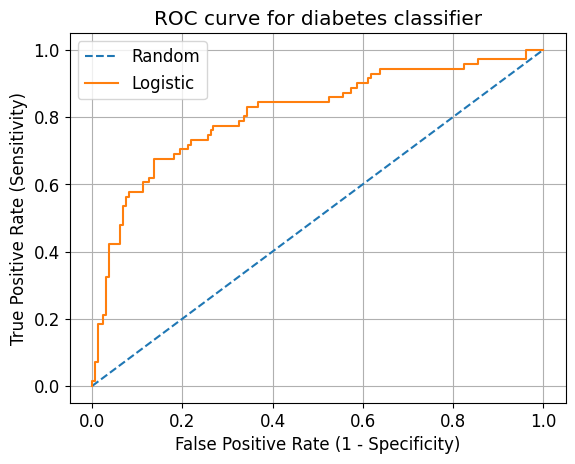

In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

# calculate AUC
AUC = roc_auc_score(y_test, y_pred_quant)
# print('AUC: %.3f' % auc)

# generate a random prediction probability 
y_rand_probs = [0 for _ in range(len(y_test))]

# calculate scores
y_rand_auc = roc_auc_score(y_test, y_rand_probs)
y_test_auc = roc_auc_score(y_test, y_pred_quant)

# # summarize scores
# print('Random: ROC AUC=', y_rand_auc)
# print('Logistic: ROC AUC=', y_test_auc)

# calculate roc curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, y_rand_probs)
fpr, tpr, _ = roc_curve(y_test, y_pred_quant)


# plot the roc curve for the model
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random')
plt.plot(fpr, tpr, label='Logistic')

plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# show the legend
plt.legend()

In [35]:
rand_tpr

array([0.        , 0.01408451, 0.01408451, 0.07042254, 0.07042254,
       0.18309859, 0.18309859, 0.21126761, 0.21126761, 0.32394366,
       0.32394366, 0.42253521, 0.42253521, 0.47887324, 0.47887324,
       0.53521127, 0.53521127, 0.56338028, 0.56338028, 0.57746479,
       0.57746479, 0.6056338 , 0.6056338 , 0.61971831, 0.61971831,
       0.67605634, 0.67605634, 0.69014085, 0.69014085, 0.70422535,
       0.70422535, 0.71830986, 0.71830986, 0.73239437, 0.73239437,
       0.74647887, 0.74647887, 0.76056338, 0.76056338, 0.77464789,
       0.77464789, 0.78873239, 0.78873239, 0.8028169 , 0.8028169 ,
       0.83098592, 0.83098592, 0.84507042, 0.84507042, 0.85915493,
       0.85915493, 0.87323944, 0.87323944, 0.88732394, 0.88732394,
       0.90140845, 0.90140845, 0.91549296, 0.91549296, 0.92957746,
       0.92957746, 0.94366197, 0.94366197, 0.95774648, 0.95774648,
       0.97183099, 0.97183099, 1.        , 1.        ])